# CSC17104 – LẬP TRÌNH KHOA HỌC DỮ LIỆU
# ĐỒ ÁN CUỐI KỲ: Data Science Salaries 2023

---

## **GVHD:** Phạm Trọng Nghĩa - Lê Nhựt Nam - Nguyễn Thanh Tình

## **Thành viên nhóm:**
- 23122011 - Đoàn Hải Nam
- 23122014 - Hoàng Minh Trung
- 23122036 - Nguyển Ngọc Khoa

---

# I. Giới thiệu

Tổng quan về dự án và tập dữ liệu đã chọn.

---

# II. Quy trình thực hiện

Dự án này tuân theo quy trình khoa học dữ liệu tiêu chuẩn:
1. Thu thập dữ liệu
2. Khám phá dữ liệu
3. Đặt câu hỏi
4. Phân tích dữ liệu
5. Tổng kết & Suy ngẫm

---

## 1 Thu thập dữ liệu

### Chủ đề dữ liệu là gì?
- **Mô tả chủ đề, lĩnh vực hoặc hiện tượng**: Bộ dữ liệu nói về mức lương của các vị trí công việc thuộc lĩnh vực Data Science và các lĩnh vực liên quan (Data Analyst, Data Engineer, Machine Learning Engineer, AI Engineer,…). Nó ghi nhận các yếu tố ảnh hưởng đến lương như kinh nghiệm, chức danh, loại hình làm việc, mức độ làm việc từ xa, vị trí công ty và quy mô công ty.
- **Bối cảnh thực tế nào được đại diện?**: Bộ dữ liệu phản ánh thực tế thị trường việc làm Data Science toàn cầu trong giai đoạn 2020–2023, đặc biệt là sự bùng nổ của làm việc từ xa sau đại dịch COVID-19, sự chênh lệch lương mạnh mẽ giữa các khu vực địa lý (đặc biệt Mỹ so với phần còn lại của thế giới), và xu hướng trả lương cao hơn ở các công ty lớn hoặc các vị trí senior/executive.

### Nguồn dữ liệu là gì?
- **Tên nền tảng (Kaggle, UCI, v.v.) và URL đầy đủ**: Kaggle – https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data
- **Tác giả gốc**: [randomarnab](https://www.kaggle.com/arnabchaki)
- **Ngày xuất bản/thu thập**: Được đăng tải trên Kaggle vào năm 2023 (dữ liệu lương trải dài từ 2020 đến 2023).

### Dữ liệu này có được cấp phép để sử dụng không?
- **Bộ dữ liệu có giấy phép gì?**: [Open Data Commons Attribution License v1.0 (ODC-By)](https://opendatacommons.org/licenses/dbcl/1-0/)
- **Ta có được phép sử dụng nó cho mục đích giáo dục không?**: Hoàn toàn được phép sử dụng cho mục đích học tập, nghiên cứu, thương mại,… miễn là ghi nguồn đầy đủ.
- **Ghi lại bất kỳ hạn chế sử dụng hoặc yêu cầu ghi công nào**: Chỉ cần ghi nguồn (attribute) cho tác giả Arnab Chaki và link Kaggle là đáp ứng đủ yêu cầu giấy phép. Không có hạn chế nào khác.

### Dữ liệu này được thu thập như thế nào?
- **Phương pháp thu thập**: Chủ yếu thu thập bằng phương pháp web scraping từ các trang web công khai về lương (như Levels.fyi, Glassdoor, và một số job board khác), có thể kết hợp dữ liệu crowdsourced.
- **Dân số mục tiêu và phương pháp lấy mẫu**: Dân số mục tiêu là những người làm việc trong lĩnh vực data toàn cầu. Phương pháp lấy mẫu là convenience sampling/opportunistic (lấy dữ liệu có sẵn công khai), không phải random sampling.
- **Khoảng thời gian thu thập dữ liệu**: Ghi nhận lương của các năm 2020, 2021, 2022 và 2023.
- **Bất kỳ hạn chế hoặc sai lệch nào đã biết trong quá trình thu thập**:
  - Thiên mạnh về dữ liệu từ Mỹ và các nước phát triển, ít dữ liệu từ châu Á, châu Phi, Mỹ Latinh.
  - Người có lương cao thường sẵn lòng công khai hơn → có khả năng bị bias lên cao (inflated salary).
  - Không có thông tin cá nhân (tuổi, giới tính, dân tộc) để bảo vệ quyền riêng tư.
  - Một số vị trí công việc rất niche hoặc ở công ty nhỏ/startup có thể không xuất hiện.

### Tại sao chọn bộ dữ liệu này?
- **Điều gì khiến nhóm quan tâm đến chủ đề này?**: Nhóm chúng em đều đang học và định hướng theo ngành Data Science/AI nên rất quan tâm đến thực tế lương thưởng, sự khác biệt giữa các vị trí, ảnh hưởng của làm remote và vị trí địa lý tới thu nhập. Đây là chủ đề rất thực tế và gần gũi với sự nghiệp tương lai của cả nhóm.
- **Dữ liệu này có thể cung cấp những câu hỏi hoặc thông tin chi tiết tiềm năng nào?**:
  - Mức lương trung bình của Data Scientist là bao nhiêu? Xu hướng tăng lương qua các năm ra sao?
  - Làm remote 100% có thực sự giúp người ở các nước lương thấp tiếp cận mức lương cao hơn không?
  - Chức danh nào (Data Scientist, ML Engineer, Data Engineer,…) có mức lương cao nhất khi cùng level kinh nghiệm?
  - Quy mô công ty (S/M/L) ảnh hưởng thế nào đến lương khi kiểm soát các yếu tố khác?
  - Có thể xây dựng mô hình dự đoán lương dựa trên kinh nghiệm, vị trí, loại hình làm việc không?

In [1]:
# Import các thư viện cần thiết
import sys
import os
import numpy as np

# Add src to path to import modules
sys.path.append(os.path.abspath('src'))

from src import data_processing as dp
from src import visualization as vis

# Tải tập dữ liệu
df = dp.load_data('data/raw/ds_salaries.csv')
df.head()

Successfully loaded data from data/raw/ds_salaries.csv


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


---

## 2. Khám phá dữ liệu
Điều tra kỹ lưỡng cấu trúc, chất lượng và đặc điểm của tập dữ liệu.

### 2.1. Tổng quan về tập dữ liệu

#### **Thông tin cơ bản:**
*   Số lượng dòng: 3755
*   Số lượng cột: 11
*   Mỗi dòng đại diện cho một bản ghi mô tả mức lương của một nhân sự làm việc trong lĩnh vực Data Science. Bao gồm các thông tin về **cấp độ kinh nghiệm, loại hợp đồng, chức danh công việc, mức lương (cả tiền gốc và USD), quốc gia cư trú, tỷ lệ làm việc từ xa, quốc gia công ty và quy mô công ty**. Nói cách khác, mỗi dòng là một bản ghi mô tả **mức lương và điều kiện làm việc của một cá nhân cụ thể** trong ngành Data Science.

*   Kích thước tổng thể: 41305

In [2]:
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Total size: {df.size} elements")

Shape: 3755 rows, 11 columns
Total size: 41305 elements


#### **Tính toàn vẹn dữ liệu:**
*   Số dòng trùng lặp: 1171
*   Các dòng trống: 0
*   Các dòng trùng lặp **nên được loại bỏ**.

    Tổng cộng 1.171 bản ghi trùng xuất hiện dưới dạng các dòng **giống hệt nhau trên toàn bộ các thuộc tính**, những bản ghi này thực chất mô tả **cùng một quan sát** được ghi nhận nhiều lần và **không mang thêm thông tin mới**.

    Việc giữ những bản ghi này sẽ khiến dataset bị **lệch phân phối**, làm sai kết quả thống kê và gây **overfitting** cho mô hình dự báo. Mặc dù tỷ lệ trùng lặp khá cao (khoảng **31%**), việc loại bỏ chúng là cần thiết để đảm bảo dữ liệu **sạch, không thiên lệch**, và phản ánh chính xác phân bố thực tế.


In [3]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

empty_rows = df.isnull().all(axis=1).sum()
print(f"Empty rows: {empty_rows}")

Duplicate rows: 1171
Empty rows: 0


In [4]:
df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape[0]} rows, {df.shape[1]} columns")

After dropping duplicates: 2584 rows, 11 columns


#### **Danh sách các cột:**

**Thông tin mỗi cột:**

* **work_year**: Năm mà mức lương được trả.
* **experience_level**: Cấp độ kinh nghiệm của nhân viên trong năm làm việc.
* **employment_type**: Loại hình hợp đồng lao động cho vị trí đó.
* **job_title**: Chức danh công việc trong năm được ghi nhận.
* **salary**: Tổng mức lương được trả trước thuế (đơn vị tiền tệ gốc).
* **salary_currency**: Loại tiền tệ được trả lương theo mã ISO 4217.
* **salary_in_usd**: Mức lương đã được quy đổi sang USD.
* **employee_residence**: Quốc gia nơi nhân viên cư trú trong năm làm việc (theo mã ISO 3166).
* **remote_ratio**: Tỷ lệ phần trăm công việc được thực hiện từ xa.
* **company_location**: Quốc gia nơi đặt trụ sở chính hoặc chi nhánh của công ty.
* **company_size**: Quy mô công ty (số lượng nhân viên trung bình trong năm).

**Các cột liên quan đến phân tích tiềm năng:**

**Các cột nên bị loại bỏ**

### **Các kiểu dữ liệu:**
*   Kiểu dữ liệu hiện tại của từng cột

In [5]:
# Kiểm tra kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


*   *Các cột có kiểu dữ liệu không phù hợp*
*   *Các chuyển đổi kiểu dữ liệu cần thiết*

### 2.2. Phân tích các cột số (Numerical Columns)

#### **work_year**

--- Metrics for: work_year ---

[1] Distribution & Central Tendency:
   - Mean: 2022.30
   - Median: 2022.00
   - Std Dev: 0.75
   - Skewness: -0.97 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Range & Outliers:
   - Min: 2020
   - Max: 2023
   - IQR: 1.00 (Q1=2022.00, Q3=2023.00)
   - Outlier Boundaries: [2020.50, 2024.50]
   - Outlier Count: 75 (2.90%)

[3] Data Quality:
   - Missing Values: 0 (0.00%)
   - Unique Values (4): [2020, 2021, 2022, 2023]
----------------------------------------


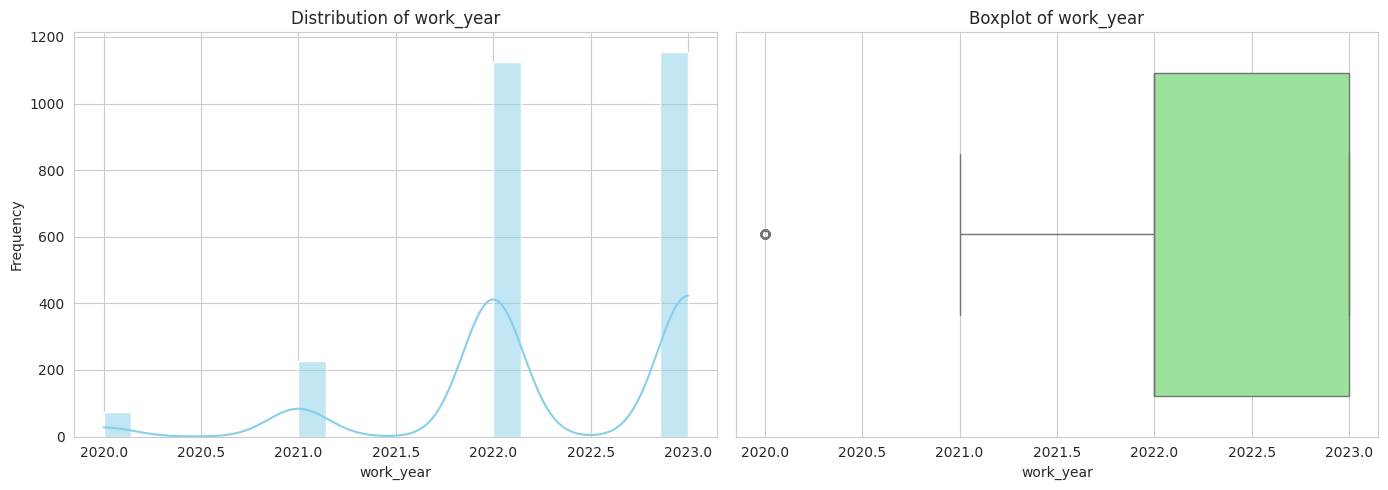

In [6]:
# Analyze and Visualize work_year
dp.analyze_numerical_column_metrics(df, 'work_year')
vis.plot_column_distribution(df, 'work_year')

**Phân bố dữ liệu:** Dữ liệu **tập trung mạnh vào 2022-2023** (~90% tổng số), trong khi 2020-2021 chỉ chiếm ~10%. Điều này phản ánh cột bị mất cân bằng và nghiêng về thị trường việc làm giai đoạn gần đây.

**Xu hướng:** Số lượng bản ghi **tăng mạnh theo năm** (2020: 75 $\rightarrow$ 2023: 1,150), cho thấy ngành Data Science phát triển nhanh hoặc nguồn dữ liệu được mở rộng.

**Đặc điểm thống kê:**
- **Skewness = -0.97** (lệch trái): xác nhận dữ liệu tập trung ở các năm mới
- **75 outliers (2.90%)**: toàn bộ là dữ liệu năm 2020 do số lượng quá ít

**Chất lượng dữ liệu:** Dữ liệu **sạch và nhất quán** - không có giá trị thiếu và cũng không có giá trị nào bất thường. Chỉ 4 giá trị duy nhất (2020-2023).

#### **salary**

--- Metrics for: salary ---

[1] Distribution & Central Tendency:
   - Mean: 210365.30
   - Median: 134630.00
   - Std Dev: 808037.54
   - Skewness: 24.09 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Range & Outliers:
   - Min: 6000
   - Max: 30400000
   - IQR: 92562.50 (Q1=90000.00, Q3=182562.50)
   - Outlier Boundaries: [-48843.75, 321406.25]
   - Outlier Count: 95 (3.68%)

[3] Data Quality:
   - Missing Values: 0 (0.00%)
----------------------------------------


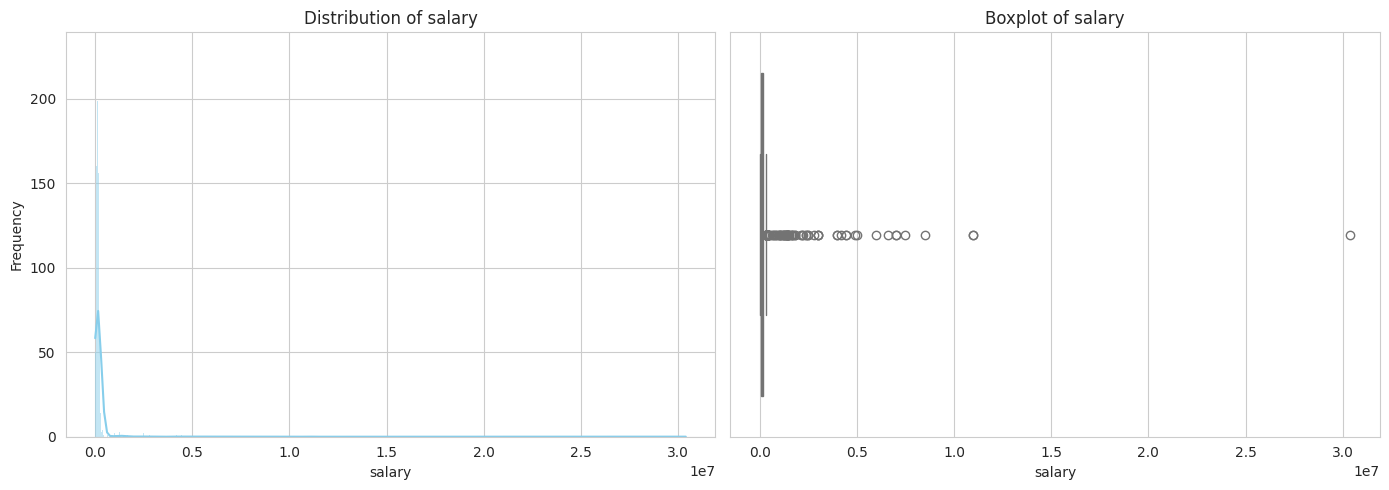

In [7]:
# Analyze and Visualize salary
dp.analyze_numerical_column_metrics(df, 'salary')
vis.plot_column_distribution(df, 'salary')

In [11]:
print("Checking impossible values:")
print(f"salary < 0: {np.sum(df['salary'] < 0)}")

Checking impossible values:
salary < 0: 0


**Phân bố dữ liệu:**
Dữ liệu có **phân bố lệch phải cực mạnh** (skewness = 24.09), tập trung chủ yếu ở khoảng **dưới 500K**, trong khi có một số ít giá trị cực cao (lên đến 30.4M). Đây là đặc trưng điển hình của dữ liệu lương.

**Xu hướng trung tâm:**

* **Mean (210K) >> Median (134K)**: chênh lệch lớn do outliers kéo trung bình lên cao
* **Median = 134K** phản ánh mức lương "điển hình" chính xác hơn
* **Độ phân tán rất cao** (Std Dev = 808K): mức lương có sự chênh lệch lớn giữa các vị trí/công ty

**Khoảng giá trị & Outliers:**

* **Khoảng lương**: 6K - 30.4M (chênh lệch ~5,000 lần!)
* **95 outliers (3.68%)**: các mức lương > 321K, có thể là C-level, vai trò đặc biệt hoặc **lỗi dữ liệu** (30.4M là bất thường)
* **IQR = 92.5K** (Q1=90K, Q3=182.5K): 50% dữ liệu nằm trong khoảng hẹp này

**Chất lượng dữ liệu:**

* **Không có giá trị thiếu** và không có lương âm
* **Cần kiểm tra outliers**: giá trị 30.4M có thể là lỗi nhập liệu (nhầm đơn vị tiền tệ, thêm số 0)

**Khuyến nghị**

* **Sử dụng Median** thay vì Mean cho phân tích tổng quan
* **Xử lý outliers**: xem xét loại bỏ hoặc điều tra các giá trị > 1M
* **Phân tích theo nhóm**: phân chia theo experience_level, job_title để hiểu rõ sự chênh lệch
* **Chuẩn hóa dữ liệu**: xem xét log transformation để phân tích mô hình

#### **salary_in_usd**

--- Metrics for: salary_in_usd ---

[1] Distribution & Central Tendency:
   - Mean: 133409.28
   - Median: 130000.00
   - Std Dev: 67136.84
   - Skewness: 0.62 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Range & Outliers:
   - Min: 5132
   - Max: 450000
   - IQR: 90025.00 (Q1=84975.00, Q3=175000.00)
   - Outlier Boundaries: [-50062.50, 310037.50]
   - Outlier Count: 29 (1.12%)

[3] Data Quality:
   - Missing Values: 0 (0.00%)
----------------------------------------


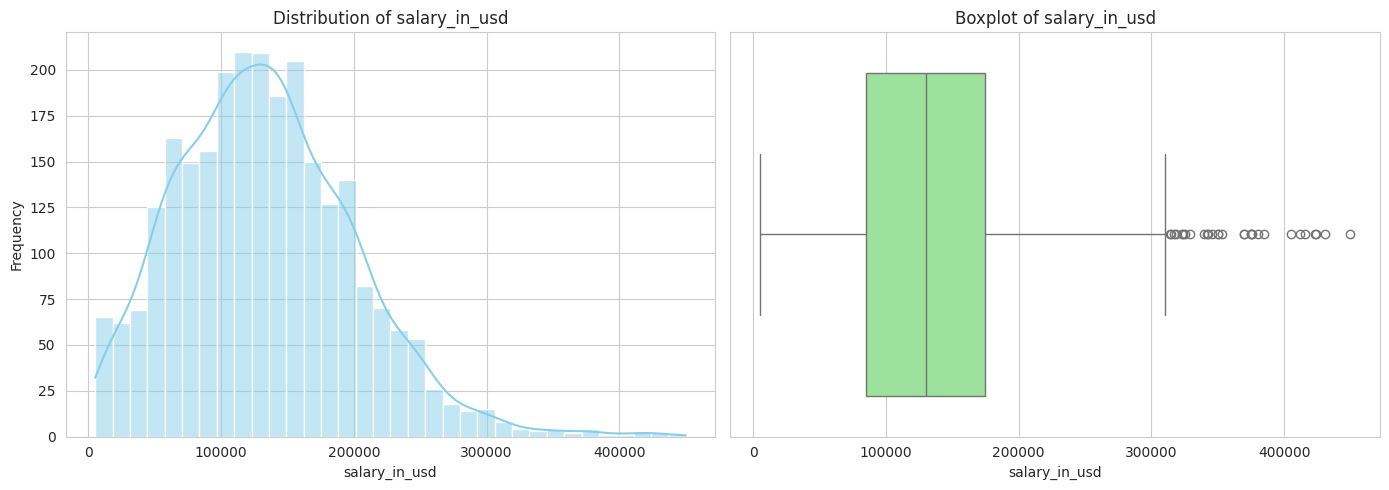

In [12]:
# Analyze and Visualize salary_in_usd
dp.analyze_numerical_column_metrics(df, 'salary_in_usd')
vis.plot_column_distribution(df, 'salary_in_usd')

In [13]:
print("Checking impossible values:")
print(f"salary_in_usd < 0: {np.sum(df['salary_in_usd'] < 0)}")

Checking impossible values:
salary_in_usd < 0: 0


**Phân bố dữ liệu:**
Dữ liệu có **phân bố gần chuẩn với lệch phải nhẹ** (skewness = 0.62), tập trung chủ yếu ở khoảng **100K-200K USD**. Đây là phân bố **hợp lý và đại diện** cho thị trường lương Data Science toàn cầu.

**Xu hướng trung tâm:**

* **Mean (133K) ≈ Median (130K)**: chênh lệch nhỏ cho thấy dữ liệu cân đối hơn nhiều so với cột `salary` gốc
* **Std Dev = 67K**: độ biến động vừa phải, phản ánh sự chênh lệch tự nhiên theo kinh nghiệm và vị trí
* Mức lương trung bình **130K USD** là con số thực tế cho ngành Data Science

**Khoảng giá trị & Outliers:**

* **Khoảng lương**: 5K - 450K (khoảng hợp lý hơn nhiều so với cột `salary`)
* **Chỉ 29 outliers (1.12%)**: giảm đáng kể từ 3.68%, cho thấy việc quy đổi USD đã **chuẩn hóa tốt** dữ liệu
* **IQR = 90K** (Q1=85K, Q3=175K): 50% dữ liệu nằm trong khoảng hợp lý

**So sánh với cột salary:**

* **Phân bố ổn định hơn**: skewness giảm từ 24.09 xuống 0.62
* **Ít outliers hơn**: từ 95 xuống 29 điểm
* **Loại bỏ nhiễu tiền tệ**: không còn giá trị bất thường như 30.4M

**Chất lượng dữ liệu:**

* **Không có giá trị thiếu** và không có lương âm
* **Dữ liệu đã được làm sạch tốt** thông qua quy đổi USD

#### **remote_ratio**

--- Metrics for: remote_ratio ---

[1] Distribution & Central Tendency:
   - Mean: 50.48
   - Median: 50.00
   - Std Dev: 48.16
   - Skewness: -0.02 (0 = normal, >0 = right-skewed, <0 = left-skewed)

[2] Range & Outliers:
   - Min: 0
   - Max: 100
   - IQR: 100.00 (Q1=0.00, Q3=100.00)
   - Outlier Boundaries: [-150.00, 250.00]
   - Outlier Count: 0 (0.00%)

[3] Data Quality:
   - Missing Values: 0 (0.00%)
   - Unique Values (3): [0, 50, 100]
----------------------------------------


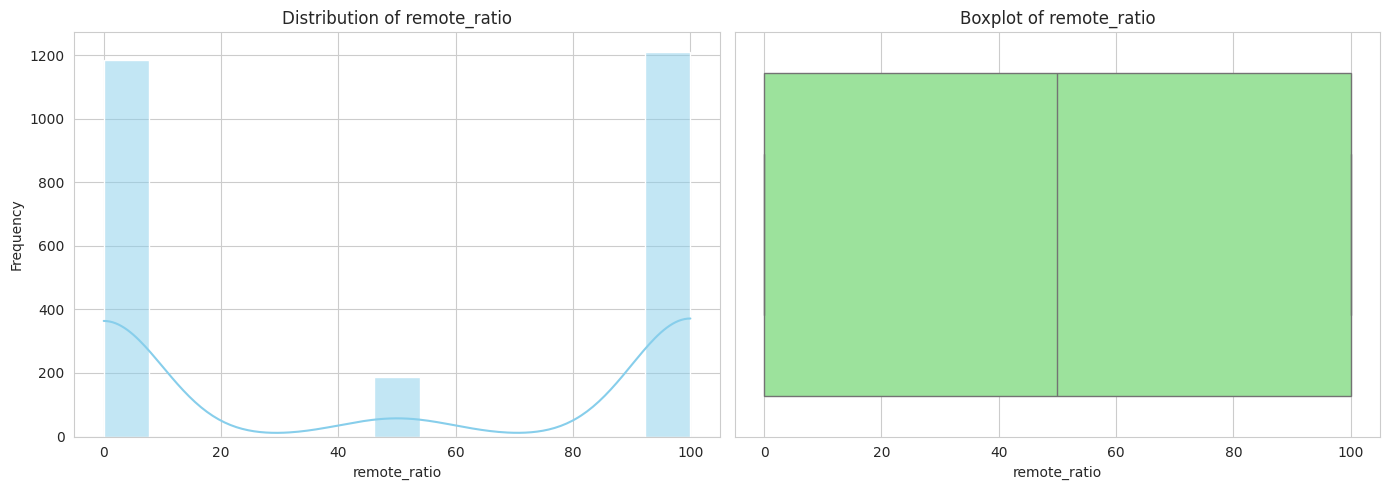

In [14]:
# Analyze and Visualize remote_ratio
dp.analyze_numerical_column_metrics(df, 'remote_ratio')
vis.plot_column_distribution(df, 'remote_ratio')

**Phân bố dữ liệu**
Dữ liệu có **phân bố hai cực (bimodal)** với 3 giá trị duy nhất: **0, 50, 100**. Tập trung chủ yếu ở hai đầu cực (0% và 100% remote), trong khi 50% chiếm tỷ lệ thấp hơn nhiều.

**Đặc điểm phân bố**

* **Skewness ≈ 0** (-0.02): phân bố gần như đối xứng hoàn hảo
* **Mean = Median = 50**: xác nhận tính đối xứng, nhưng **không phản ánh xu hướng thực tế** do dữ liệu tập trung ở hai cực
* **IQR = 100** (Q1=0, Q3=100): 50% dữ liệu nằm ở hai biên, cho thấy **phân hóa rõ rệt** giữa onsite và remote

**Xu hướng làm việc**
Biểu đồ cho thấy thị trường **phân hóa mạnh**:

* **~1,200 công việc 100% remote**: xu hướng làm việc từ xa phổ biến
* **~1,180 công việc 0% remote**: vẫn có nhu cầu cao làm việc tại văn phòng
* **~200 công việc hybrid (50%)**: mô hình kết hợp ít phổ biến hơn

**Chất lượng dữ liệu**

* **Không có giá trị thiếu** và không có outliers
* **Dữ liệu rời rạc**: chỉ 3 giá trị (0, 50, 100) - phù hợp với cách phân loại thực tế
* **Khoảng hợp lý**: từ 0-100

### 2.3. Phân tích các cột phân loại (Categorical Columns)
**Phân phối giá trị:**
*   *Số lượng giá trị duy nhất*
*   *Các giá trị xuất hiện thường xuyên nhất*
*   *Cân bằng hay mất cân bằng?*

**Chất lượng dữ liệu:**
*   *Tỷ lệ giá trị bị thiếu*
*   *Sự không nhất quán (lỗi chính tả, biến thể)*
*   *Các giá trị không mong muốn*

In [ ]:
# Code phân tích dữ liệu phân loại (value_counts, biểu đồ cột)


### 2.4. Phân tích dữ liệu bị thiếu
**Đánh giá tổng thể:**
*   *Bảng tóm tắt dữ liệu thiếu*
*   *Mô hình thiếu (ngẫu nhiên hay có quy luật)*

**Chiến lược cho từng cột:**
*   *Lý do bị thiếu*
*   *Kế hoạch xử lý (loại bỏ, điền giá trị, v.v.)*

In [ ]:
# Code phân tích dữ liệu thiếu (heatmap, đếm null)


### 2.5. Mối quan hệ & Tương quan
**Các mẫu sơ bộ:**
*   *Ma trận tương quan / Heatmap*
*   *Các cặp tương quan mạnh*

**Bảng chéo (Cross-tabulations):**
*   *Phân loại vs Phân loại*
*   *Số vs Phân loại (thống kê nhóm)*

In [ ]:
# Code tính tương quan


### 2.6. Quan sát & Nhận định ban đầu
**Tóm tắt:**
*   *3-5 quan sát chính*
*   *Các vấn đề chất lượng dữ liệu đã xác định*
*   *Các bước tiền xử lý cần thiết*
*   *Các mẫu thú vị dẫn đến câu hỏi nghiên cứu*

**Cờ đỏ (Red Flags):**
*   *Các lo ngại nghiêm trọng về chất lượng dữ liệu*
*   *Các hạn chế*

---

## 3. Đặt câu hỏi
Xác định 2 × n câu hỏi ý nghĩa (với n là số thành viên nhóm). Ít nhất 1 câu hỏi phải yêu cầu xây dựng mô hình Machine Learning.

**Danh sách câu hỏi:**
1.  ...
2.  ...
3.  ...
4.  ...
5.  ...
6.  ...

---

## 4. Phân tích dữ liệu
Đối với mỗi câu hỏi nghiên cứu, hãy hoàn thành các bước sau.

#### Câu hỏi 1: [Nhập câu hỏi tại đây]

**1. Câu hỏi:**
*Nêu rõ câu hỏi nghiên cứu một cách cụ thể.*

**2. Động lực & Lợi ích:**
*Tại sao câu hỏi này đáng để điều tra? Ai quan tâm? Nó mang lại thông tin gì?*

**A. Tiền xử lý (nếu cần)**
*   *Mô tả các bước rõ ràng*
*   *Giải thích logic*
*   *Triển khai code*

In [ ]:
# Code tiền xử lý cho Câu hỏi 1


**B. Phân tích**
*   *Mô tả phương pháp phân tích*
*   *Giải thích tại sao dùng phương pháp đó*
*   *Triển khai code (ngắn gọn, dễ đọc, có chú thích)*
*   *(Đối với ML: Giải thích thiết lập, mô hình, đánh giá)*

In [ ]:
# Code phân tích cho Câu hỏi 1


**C. Kết quả & Diễn giải**
*   *Trực quan hóa (2+ biểu đồ liên quan)*
*   *Phân tích bằng văn bản (Trả lời rõ ràng với bằng chứng, trích dẫn số liệu, thảo luận ý nghĩa)*

In [ ]:
# Code trực quan hóa cho Câu hỏi 1


#### Câu hỏi 2: [Nhập câu hỏi tại đây]

*(Lặp lại cấu trúc: Câu hỏi, Động lực, Tiền xử lý, Phân tích, Kết quả)*

*(Lặp lại cho các câu hỏi còn lại...)*

---

## 5. Tổng kết

### Tóm tắt dự án
**Những phát hiện chính:**
*   *Liệt kê 3-5 thông tin chi tiết quan trọng nhất*
*   *Nêu bật phát hiện thú vị nhất*

### Hạn chế
*   *Hạn chế về dữ liệu (kích thước mẫu, bias)*
*   *Hạn chế về phân tích*
*   *Hạn chế về phạm vi*

### Hướng phát triển trong tương lai
*   *Các câu hỏi bổ sung để khám phá*
*   *Cơ hội phân tích sâu hơn*
*   *Các phương pháp thay thế*

### Suy ngẫm cá nhân
**Thành viên 1:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*

**Thành viên 2:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*

**Thành viên 3:**
*   *Khó khăn & Thử thách*
*   *Bài học & Tăng trưởng*